# COMUNICACIONES DIGITALES
> Máster en Ingeniería de Telecomunicación<br>
> Curso 2021/22

## Práctica 4c - Acceso al medio (III)

Vamos a analizar la probabilidad de error obtenida mediante una técnica de espectro ensanchado DS en función de la potencia del ruido en el canal de transmisión.

### 0 - PARÁMETROS DE CONFIGURACIÓN

In [1]:
import numpy as np                  #Librería matemática
import matplotlib.pyplot as plt     #Librería gráfica
Nbits = 10000                       #Número de bits que se van a transmitir
chips = 127                         #Número de chips en los que se dividirá cada bit

### 1 - GENERACIÓN DEL MENSAJE
Generamos un mensaje que será la entrada a nuestro sistema

In [2]:
bits_fuente = np.random.randint(2,size=Nbits)

### 2 - EXPANSIÓN DE LA SEÑAL
Expando la señal, de modo que cada bit se repite 'chips' veces. De paso hago una modulación sencilla, de forma que '0' -> -1 y '1' -> 1

In [3]:
senal_fuente = 2*bits_fuente.repeat(chips)-1

### 3 - GENERACIÓN DE LA SEÑAL DS
Generamos el código del usuario, y multiplico la señal por él. El resultado es la señal que se va a transmitir por el canal

In [4]:
codigo = 2*np.random.randint(2,size=Nbits*chips)-1
senal_tx = senal_fuente*codigo

### 4 - TRANSMISIÓN

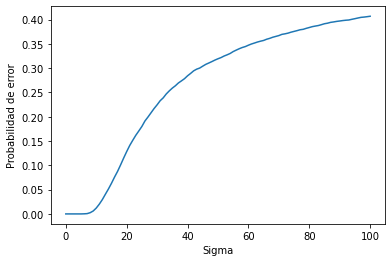

In [5]:

from Canal import canalAWGN
pe = np.zeros(100+1)

for sigma in range(0,101):
    senal_rx = canalAWGN(senal_tx, sigma/2)
    bits_rx = senal_rx*codigo
    matriz_decisor = np.reshape(bits_rx,(-1,chips)).sum(1)
    decisor = np.array([0 if k<0 else 1 for k in matriz_decisor])   
    errores = np.sum(np.abs(bits_fuente-decisor))
    pe[sigma] = errores/len(bits_fuente)

plt.plot(pe)
plt.xlabel("Sigma")
plt.ylabel("Probabilidad de error")
plt.show()